<a href="https://colab.research.google.com/github/sandipanpaul21/Data_Science_INSHORT/blob/main/EDA_01_Univariate_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**UNIVARIATE ANALYSIS**

*Uni Means ONE.* So Univariate Analysis is One Variable Analysis. Mainly in this part, we will deal with Numerical Measures. So in total we have 14 Numerical Measures

**Measure of Central Tendency:** 1. Mean 2. Median 3. Mode

**Measure of Data Spread:** 4. Quartile 5. Percentile 6. Range 7. IQR 8. Boxplot 9. Variance 10. Standard Deviation

**Variation between Variables:** 11. Covariance 12. Correlation Coefficient (Pearson and Spearman)

**Measure Distribution and Peakness :** 13. Skewness 14. Kurtosis

In [1]:
# Import pandas library
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
# initialize list of lists
data = [['Sandipan', 28, 5000, 'Male'],['Ashish', 31, 15000, 'Male'],
        ['Vaibhav', 27, 25000, 'Male'],['Sukanya', 26, 400000, 'Female'],['Sandipan', 28, 5000, 'Male']]
# Create the pandas DataFrame
fd_customer_data = pd.DataFrame(data, columns=['Name', 'Age','Amount','Gender'])
fd_customer_data.head()

,Name,Age,Amount,Gender
0,Sandipan,28,5000,Male
1,Ashish,31,15000,Male
2,Vaibhav,27,25000,Male
3,Sukanya,26,400000,Female
4,Sandipan,28,5000,Male


**Central Tendency**
- It may also be called a centre or location of the distribution. The most common measures of central tendency are the arithmetic mean, the median, and the mode.

**Mean**
- The mean is the **mathematical average of a set of two or more numbers**. It is also known as **Arithmetic Mean**.
- Summing the numbers in a set and dividing by the total number gives you the arithmetic mean.

In [2]:
# Mean
# By default, axis = 0 for Column Wise Mean, axis = 0 and Row Wise Mean, axis = 1
print(fd_customer_data.mean())
# Column-wise Mean calculation. 
# The Average age of customers in the dataset is 28 and the Average FD investment is Rs 90,000

Age          28.0
Amount    90000.0
dtype: float64


**MEDIAN**
- The **median is the middle number in a sorted**, ascending or descending.
- The median is sometimes used as opposed to the mean when there are outliers in the sequence that might skew the average of the values whereas **the median in most cases is not affected by outliers**, below is the example.
- If there is an **odd amount of numbers**, the median value is the number that is in the middle, with the same amount of numbers below and above.
- If there is an **even amount of numbers** in the list, the middle pair must be determined, added together, and divided by two to find the median value.

In [3]:
# Median
# By default, axis = 0 for Column Wise Mean, axis = 0 and Row Wise Mean, axis = 1
fd_customer_data.median()
# Column-wise Median calculation. 
# The inference is Average age of customers in the dataset is 27.5 and the Average FD investment is Rs 20,000. 
# But Mean FD Investment is Rs. 1,11,250 (refer above). 
# This is because Mean is affected by Outlier but Median is not affected by Outliers.

Age          28.0
Amount    15000.0
dtype: float64

In [4]:
# Mode 
fd_customer_data['Gender'].mode()
# The inference is the Mode of Gender column is 'Male' as it is the most occurring category in the column.

0    Male
dtype: object

In [5]:
# Category Wise Distribution
fd_customer_data['Gender'].value_counts()

Male      4
Female    1
Name: Gender, dtype: int64

**Data Spread**

Spread of data (also known as variation, fluctuation, dispersion, etc.) is the measure of how far the data ranges from the center of data (mean or the median). 

**Inter Quartile Range(IQR)**
- The inter quartile range (IQR) is the length of the middle 50% of that interval of space(25% of Data to 75% of Data).
- Example question: Find the IQR for the following data set: 1,2,3,4,5,6,7,8,9,10
- **Step 1: Put the numbers in order**
  - 1,2,3,4,5,6,7,8,9,10
- **Step 2: Make a mark in the centre of the data**
  - (1,2,3,4,5) | (6,7,8,9,10) 
  - **Q1 (First Quartile)** is the median (the middle) of the lower half of the data and **Q3 (Second Quartile)** is the median (the middle) of the upper half of the data. **Q1 = 3 and Q3 = 8.**
- **Step 3: Subtract Q1 from Q3**
  - 8–3 = 5. This is our **Inter Quartile Range (IQR)**

In [6]:
# IQR, Quartile and Range 
fd_customer_data.describe().round(2)
# Inference is Inter Quartile Range (75% - 25%) of Customer Age is 28–27 = 1. 
# Range (Min to Max) of the Customer Age is 26 to 31 with the mean age of the customer being 28.

,Age,Amount
count,5.00,5.00
mean,28.00,90000.00
std,1.87,173493.52
min,26.00,5000.00
25%,27.00,5000.00
50%,28.00,15000.00
75%,28.00,25000.00
max,31.00,400000.00


**Percentile**
- The value below which a percentage of data falls. 
- **Example**: You are the fourth tallest person in a group of 20. 80% of people are shorter than you.

In [7]:
# Percentile
fd_customer_data['Amount'].quantile([0, 0.2, 0.4, 0.6, 0.8, 1])
# The inference is for the first 60% of data, the amount invested is Rs 19,000 
# But the remaining 40% amount invested is almost tangentially very high from Rs 19,000 to Rs 4,00,000. 
# Is this normal or an outlier is there?

0.0      5000.0
0.2      5000.0
0.4     11000.0
0.6     19000.0
0.8    100000.0
1.0    400000.0
Name: Amount, dtype: float64

Box Plot for FD Investment Dataset


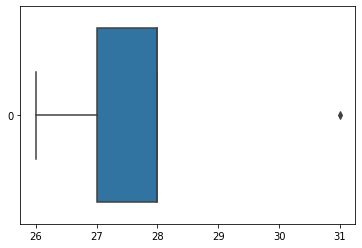

In [8]:
# Boxplot
import seaborn as sns
print("Box Plot for FD Investment Dataset")
sns.boxplot(data = fd_customer_data['Age'], orient = 'h')
# The inference is box plot for Customer Age invest in FD, Q3 is at Age 25 and Outlier is shown at 31. 
# But is Age 31 a really an Outlier ?

**Standard Deviation**

The Standard Deviation is a measure of how spread out numbers are. Symbol is σ (the greek letter sigma). The formula is easy: it is the square root of the Variance. 

**Variance**

The average of the squared differences from the Mean.

**To calculate the variance follow these steps:**

1. Work out the Mean (the simple average of the numbers)
2. Then for each number: subtract the Mean and square the result (the squared difference).
3. Then work out the average of those squared differences. (Why Square?)

**EXAMPLE : 
The heights are: 10, 20, 30, 40 and 50. Find out the Mean, the Variance, and the Standard Deviation.**

**Mean =**	(10+20+30+40+50)/5 = 150/5 = 30m

**Variance =**

If we don't square, then result is 0

[(30-10)+(30-20)+(30-30)+(30-40)+(30-50)]/5 = [20+10+0-10-20]/5 = 0

That's why we square

(30-10)^2+(30-20)^2+(30-30)^2+(30-40)^2+(30-50)^2/5 = (400 + 100 + 0 + 100 + 400 )/5 = 1000/5 = 200

**Standard Deviation =**

Sqaure Root(500) = 22.36 (Same scale of the data)

In [9]:
# Variance
fd_customer_data.var().round(2)
# The inference is the Variance of Customer Age invested in FD is 3.5, 
# it is hard to interpret because the variance is not on the same scale as Data. 
# Refer to Standard Deviation for easy interpretation.

Age       3.500000e+00
Amount    3.010000e+10
dtype: float64

**STANDARD DEVIATION (SD)**

Standard Deviation = Square root(Variance)

**SMALL SD** means the values in the dataset are close to the mean of the dataset on average. **LARGE SD** means that the value in the dataset is far away from the mean of the dataset on average.

In short, Standard Deviation measures how concentrated the data is around the mean. More Concentration -> Smaller Standard Deviation

**A SMALL SD can be the goal in certain situations where results are restricted**

For example, In Product manufacturing and Quality Control companies. Suppose a particular type of car part that has to be 2 cm in diameter to properly fit cannot have a very BIG SD in the manufacturing process. A BIG SD would mean most material would end up in the trash because they don't fight right

**A HIGH SD reflects a large amount of variation in the group**

For example, if we look at the salaries for everyone in the company from intern to CEO, SD may be very large. On another hand, if we see or observe only the intern group, the SD of salary may be low

**Few important points about Standard Deviation**
SD **can be low or high depending** on the scenario. **Outliers may affect the SD** as the formula contains the mean. SD **cannot be negative and the lowest possible value is 0**. 0 is only possible when every single entity is having the same number (No Deviation). SD has the **same unit as the original data**.

In [10]:
# Standard Deviation
fd_customer_data.std().round(2)

Age            1.87
Amount    173493.52
dtype: float64

**SKEWNESS**

In the curve of a distribution, the data on the right side of the curve may taper differently from the data on the left side. These taperings are known as "**tails**".

If the data graphs symmetrically, the distribution has zero skewness, regardless of how long or fat the tails are.

- If **Skewness = 0**, data is perfectly symmetrical

- If **Skewness is less than -1 or greater than +1**, distribution is highly skewed

- If **Skewness is between -1 and -0.5 or between 0.5 and 1**, distribution is moderately skewed

- If **Skewness is between -0.5 and 0.5** then it is approximately symmetric

Skewness of Customer Age invested in FD : 1.15


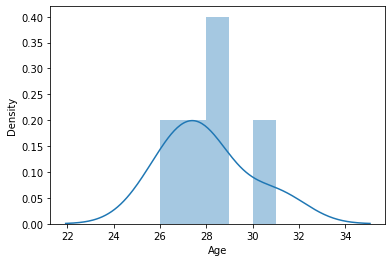

In [11]:
# Skewness
print("Skewness of Customer Age invested in FD :",fd_customer_data['Age'].skew().round(2))
sns.distplot(fd_customer_data['Age'])
# The inference is 1.15 is the Skewness of Customer Age (which is moderately skewed)

**Kurtosis**

Kurtosis is a measure of the tailedness of a distribution. Tailedness is how often outliers occur. Excess kurtosis is the tailedness of a distribution relative to a normal distribution.

- Distributions with medium kurtosis (medium tails) are **mesokurtic** (Kurtosis = 3) means Standard Normal Distribution.

- Distributions with low kurtosis (thin tails) are **platykurtic** (Kurtosis < 3) means little data on tails.

- Distributions with high kurtosis (fat tails) are **leptokurtic** (Kurtosis > 3) means lots of data on tails.

In [12]:
# Kurtosis
print("kurtosis of Customer Age invested in FD :",fd_customer_data['Age'].kurtosis().round(2))

kurtosis of Customer Age invested in FD : 2.0


In [13]:
# Revision

print("NUMERICAL MEASURES FOR CUSTOMER AGE")
pd.DataFrame([fd_customer_data['Age'].mean().round(2),fd_customer_data['Age'].median().round(2),
              fd_customer_data['Age'].var().round(2), fd_customer_data['Age'].std().round(2),
              fd_customer_data['Age'].skew().round(2),fd_customer_data['Age'].kurtosis().round(2)],
             index = ["MEAN","MEDIAN","VARIANCE","STANDARD DEVIATION","SKEWNESS","KURTOSIS"])

NUMERICAL MEASURES FOR CUSTOMER AGE


,0
MEAN,28.00
MEDIAN,28.00
VARIANCE,3.50
STANDARD DEVIATION,1.87
SKEWNESS,1.15
KURTOSIS,2.00
